In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab

from scipy.stats import ttest_ind_from_stats
from sklearn.model_selection import StratifiedKFold

In [2]:
df_path = './2020output_DFR.xlsx'
df = pd.read_excel(df_path)
df = pd.DataFrame(df)

In [3]:
df = df.drop(columns=['Unnamed: 0', 'Litigious', 'ModalStrong', 'ModalWeak', 'Negative', 'Positive', 'Uncertainty'])
df.columns

Index(['公司代碼', '公司名稱', '事務所碼', '事務所名稱', '是否為四大事務所', '四大事務所編碼', '會計師一', '會計師二',
       'KAM', 'KAM_len', 'KAM項目數', 'KAM平均詞數', '段落數', '段落平均句數', '字數', '詞數',
       '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數', '斷詞(詞性標記)', 'Litigious%', 'ModalStrong%',
       'ModalWeak%', 'Negative%', 'Positive%', 'Uncertainty%'],
      dtype='object')

In [4]:
df = df.rename(columns={"Litigious%": "爭議詞比例", "ModalStrong%": "強語氣詞比例","ModalWeak%": "弱語氣詞比例"
                   ,"Negative%": "負面詞比例","Positive%": "正面詞比例","Uncertainty%": "不確定詞比例"})

In [7]:
df['年分'] = 2020
df.columns

Index(['公司代碼', '公司名稱', '事務所碼', '事務所名稱', '是否為四大事務所', '四大事務所編碼', '會計師一', '會計師二',
       'KAM', 'KAM_len', 'KAM項目數', 'KAM平均詞數', '段落數', '段落平均句數', '字數', '詞數',
       '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數', '斷詞(詞性標記)', '爭議詞比例', '強語氣詞比例', '弱語氣詞比例',
       '負面詞比例', '正面詞比例', '不確定詞比例', '年分'],
      dtype='object')

In [8]:
df.head()

,公司代碼,公司名稱,事務所碼,事務所名稱,是否為四大事務所,四大事務所編碼,會計師一,會計師二,KAM,KAM_len,...,正向連接詞數,負向連接詞數,斷詞(詞性標記),爭議詞比例,強語氣詞比例,弱語氣詞比例,負面詞比例,正面詞比例,不確定詞比例,年分
0,000116,日盛證券,KK152,安侯建業聯合,1,2,陳俊光,鍾丹丹,關鍵查核事項關鍵查核事項係指依本會計師之專業判斷，對日盛證券股份有限公司及其子公司民國一零九...,425,...,13,1,關鍵(Na) 查核(Nv) 事項(Na) 關鍵(Na) 查核(Nv) 事項(Na) 係指(V...,0.0800,0.0024,0.0024,0.0047,0.0706,0.0165,2020
1,000930,華南永昌證券,KK203,勤業眾信聯合,1,4,黃海悅,劉永富,關鍵查核事項關鍵查核事項係指依本會計師之專業判斷，對華南永昌綜合證券集團民國109年度合併財...,294,...,11,0,關鍵(Na) 查核(Nv) 事項(Na) 關鍵(Na) 查核(Nv) 事項(Na) 係指(V...,0.0442,0.0000,0.0034,0.0136,0.0340,0.0408,2020
2,000960,富邦證券,KK152,安侯建業聯合,1,2,吳麟,鍾丹丹,關鍵查核事項關鍵查核事項係指依本會計師之專業判斷，對富邦綜合證券股份有限公司及其子公司民國一...,553,...,17,1,關鍵(Na) 查核(Nv) 事項(Na) 關鍵(Na) 查核(Nv) 事項(Na) 係指(V...,0.0579,0.0000,0.0000,0.0090,0.0669,0.0289,2020
3,000980,元大證券,KK149,資誠聯合,1,1,羅蕉森,林瑟凱,關鍵查核事項關鍵查核事項係指依本會計師之專業判斷，對元大證券股份有限公司及子公司民國109年...,662,...,27,1,關鍵(Na) 查核(Nv) 事項(Na) 關鍵(Na) 查核(Nv) 事項(Na) 係指(V...,0.0846,0.0045,0.0045,0.0060,0.0861,0.0559,2020
4,0009A0,永豐金證券,KK203,勤業眾信聯合,1,4,吳美慧,郭政弘,關鍵查核事項關鍵查核事項係指依本會計師之專業判斷，對永豐金證券集團民國109年度合併財務報表...,281,...,12,0,關鍵(Na) 查核(Nv) 事項(Na) 關鍵(Na) 查核(Nv) 事項(Na) 係指(V...,0.0641,0.0036,0.0000,0.0214,0.0498,0.0320,2020


In [9]:
df1_path = './2021output_DFR.xlsx'
df1 = pd.read_excel(df1_path)
df1 = pd.DataFrame(df1)

In [10]:
df1 = df1.drop(columns=['Unnamed: 0', 'Litigious', 'ModalStrong', 'ModalWeak', 'Negative', 'Positive', 'Uncertainty'])
df1.columns

Index(['公司代碼', '公司名稱', '事務所碼', '事務所名稱', '是否為四大事務所', '四大事務所編碼', '會計師一', '會計師二',
       'KAM', 'KAM_len', 'KAM項目數', 'KAM平均詞數', '段落數', '段落平均句數', '字數', '詞數',
       '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數', '斷詞(詞性標記)', 'Litigious%', 'ModalStrong%',
       'ModalWeak%', 'Negative%', 'Positive%', 'Uncertainty%'],
      dtype='object')

In [11]:
df1 = df1.rename(columns={"Litigious%": "爭議詞比例", "ModalStrong%": "強語氣詞比例","ModalWeak%": "弱語氣詞比例"
                   ,"Negative%": "負面詞比例","Positive%": "正面詞比例","Uncertainty%": "不確定詞比例"})

In [12]:
df1['年分'] = 2021
df1.columns

Index(['公司代碼', '公司名稱', '事務所碼', '事務所名稱', '是否為四大事務所', '四大事務所編碼', '會計師一', '會計師二',
       'KAM', 'KAM_len', 'KAM項目數', 'KAM平均詞數', '段落數', '段落平均句數', '字數', '詞數',
       '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數', '斷詞(詞性標記)', '爭議詞比例', '強語氣詞比例', '弱語氣詞比例',
       '負面詞比例', '正面詞比例', '不確定詞比例', '年分'],
      dtype='object')

In [14]:
df1.head()

,公司代碼,公司名稱,事務所碼,事務所名稱,是否為四大事務所,四大事務所編碼,會計師一,會計師二,KAM,KAM_len,...,正向連接詞數,負向連接詞數,斷詞(詞性標記),爭議詞比例,強語氣詞比例,弱語氣詞比例,負面詞比例,正面詞比例,不確定詞比例,年分
0,000116,日盛證券,KK152,安侯建業聯合,1,2,陳俊光,鍾丹丹,關鍵查核事項關鍵查核事項係指依本會計師之專業判斷，對日盛證券股份有限公司及其子公司民國一一零...,423,...,13,1,關鍵(Na) 查核(Nv) 事項(Na) 關鍵(Na) 查核(Nv) 事項(Na) 係指(V...,0.0804,0.0024,0.0024,0.0047,0.0709,0.0165,2021
1,000930,華南永昌證券,KK203,勤業眾信聯合,1,4,黃海悅,劉永富,關鍵查核事項關鍵查核事項係指依本會計師之專業判斷，對華南永昌綜合證券集團民國110年度合併財...,297,...,12,0,關鍵(Na) 查核(Nv) 事項(Na) 關鍵(Na) 查核(Nv) 事項(Na) 係指(V...,0.0471,0.0000,0.0034,0.0135,0.0337,0.0404,2021
2,000960,富邦證券,KK152,安侯建業聯合,1,2,吳麟,李逢暉,關鍵查核事項關鍵查核事項係指依本會計師之專業判斷，對富邦綜合證券股份有限公司及其子公司民國一...,551,...,17,1,關鍵(Na) 查核(Nv) 事項(Na) 關鍵(Na) 查核(Nv) 事項(Na) 係指(V...,0.0581,0.0000,0.0000,0.0091,0.0672,0.0290,2021
3,0009A0,永豐金證券,KK203,勤業眾信聯合,1,4,吳美慧,郭政弘,關鍵查核事項關鍵查核事項係指依本會計師之專業判斷，對永豐金證券集團民國110年度合併財務報表...,280,...,12,0,關鍵(Na) 查核(Nv) 事項(Na) 關鍵(Na) 查核(Nv) 事項(Na) 係指(V...,0.0643,0.0036,0.0000,0.0214,0.0500,0.0321,2021
4,1101,台泥,KK203,勤業眾信聯合,1,4,邵志明,黃惠敏,關鍵查核事項關鍵查核事項係指依本會計師之專業判斷，對台泥集團民國110年度合併財務報表之查核...,192,...,11,1,關鍵(Na) 查核(Nv) 事項(Na) 關鍵(Na) 查核(Nv) 事項(Na) 係指(V...,0.0677,0.0052,0.0000,0.0208,0.0573,0.0052,2021


In [15]:
print(len(df))
print(len(df1))

2040
1997


In [16]:
df = df.append(df1)

#### 做unigram

In [17]:
df2_path = './data0111.xlsx'
df2 = pd.read_excel(df2_path)
df2 = pd.DataFrame(df2)

In [18]:
df2 = df2.drop(columns=['Unnamed: 0'])
df2.columns

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       ...
       '龍翩', '龍邦', '龍騰', '龐大', '龜山區', '是否為四大事務所', '四大事務所編碼', '公司代碼', '公司名稱',
       '年分'],
      dtype='object', length=12516)

In [24]:
#用.merge

df_last = pd.merge(df, df2, left_on=['年分','公司代碼'], right_on=['年分','公司代碼'])

df_last = df_last.drop(columns=['是否為四大事務所_y', '四大事務所編碼_y', '公司名稱_y'])
df_last.rename(columns={'是否為四大事務所_x':'是否為四大事務所', '四大事務所編碼_x':'四大事務所編碼'}, inplace=True)
df_last.columns

Index(['公司代碼', '公司名稱_x', '事務所碼', '事務所名稱', '是否為四大事務所', '四大事務所編碼', '會計師一',
       '會計師二', 'KAM', 'KAM_len',
       ...
       '鼓風機', '齊備', '齒部', '齡明細表', '龍巖', '龍翩', '龍邦', '龍騰', '龐大', '龜山區'],
      dtype='object', length=12560)

In [25]:
len(df_last)

4037

In [22]:
#df_last.to_excel('df_last.xlsx')

In [26]:
#區分是否為四大會計師事務所
t = (df_last["是否為四大事務所"] == 1)
df_T = df_last[t].sample(n = 400, replace = False)  
f = (df_last["是否為四大事務所"] == 0)
df_F = df_last[f]   #400

df = df_T.append(df_F)

In [27]:
print(len(df_T))
print(len(df_F))
print(len(df))

400
400
800


In [28]:
df_T['公司代碼']

1443    6195
2497    2515
118     1506
2122    1440
1325    5836
        ... 
2780    3308
3873    8112
2194    1585
599     2924
2437    2428
Name: 公司代碼, Length: 400, dtype: object

#### 模型

In [5]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

import sklearn.metrics as metrics

In [7]:
df = df.drop(columns=['Unnamed: 0'])
df.columns

Index(['公司代碼', '公司名稱_x', '事務所碼', '事務所名稱', '是否為四大事務所', '四大事務所編碼', '會計師一',
       '會計師二', 'KAM', 'KAM_len',
       ...
       '鼓風機', '齊備', '齒部', '齡明細表', '龍巖', '龍翩', '龍邦', '龍騰', '龐大', '龜山區'],
      dtype='object', length=12560)

In [8]:
from sklearn.linear_model import LogisticRegression
names = ["Decision Tree", "Naive Bayes", "Logistic Regression", "AdaBoost", "Random Forest", "XGBoost"]
classifiers = [DecisionTreeClassifier(),
               GaussianNB(),
               LogisticRegression(),
               AdaBoostClassifier(),
               RandomForestClassifier(),
               XGBClassifier()           ]

In [9]:
def forKFoldclassifiscore(clf,X,y):
    #kf = KFold(n_splits=10,shuffle = True, random_state=0)
    cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    scoring = ['accuracy' ,'precision_micro','recall_micro','f1_micro','precision','recall','f1','precision_macro','recall_macro','f1_macro','roc_auc']
    clf.fit(X, y)  
    for s in scoring:
        print(s)
        results = cross_val_score(estimator=clf,X=X,y=y,cv=cv,scoring=s)
        #print(results)
        #print(results.mean())
        if s=='accuracy':
            ac.append(results.mean())
        if s=='precision':
            pre.append(results.mean())
        if s=='recall':
            rec.append(results.mean())
        if s=='f1':
            f1.append(results.mean())
        if s=='precision_macro':
            pre_ma.append(results.mean())
        if s=='recall_macro':
            rec_ma.append(results.mean())
        if s=='f1_macro':
            f1_ma.append(results.mean())
        if s=='roc_auc':
            roc.append(results.mean())
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    #confusionMatrix = confusion_matrix(y, y_pred, labels=[1, 0])
    #print(confusionMatrix)
    confusion_matrix = metrics.confusion_matrix(y, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot()
    plt.show()


In [10]:
def ResultToFrame():
    result_df = pd.DataFrame()
    result_df['Accuracy'] = ac
    result_df['Presicion'] = pre
    result_df['Recall'] = rec
    result_df['F1'] = f1
    result_df['ROC'] = roc
    result_df['Presicion_macro'] = pre_ma
    result_df['Recall_macro'] = rec_ma
    result_df['F1_macro'] = f1_ma
    result_df.index = names
    return(result_df.round(4))

In [34]:
col=['KAM_len', 'KAM項目數', 'KAM平均詞數']
X=df[col]
y=df['是否為四大事務所']

col=['爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例']
X1=df[col]
y1=df['是否為四大事務所']

col=['字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X2=df[col]
y2=df['是否為四大事務所']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例']
X3=df[col]
y3=df['是否為四大事務所']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數', '字數','詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X4=df[col]
y4=df['是否為四大事務所']

col=['爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例', '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X5=df[col]
y5=df['是否為四大事務所']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例', '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X6=df[col]
y6=df['是否為四大事務所']

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


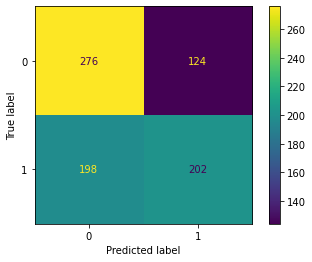

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


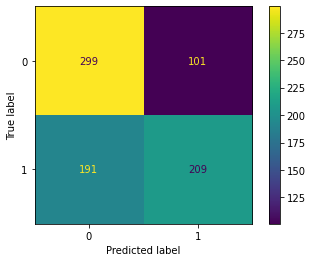

Logistic Regression
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


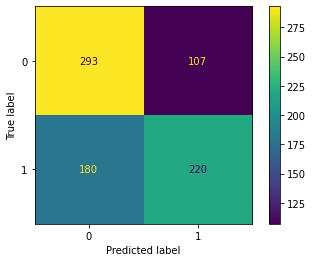

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


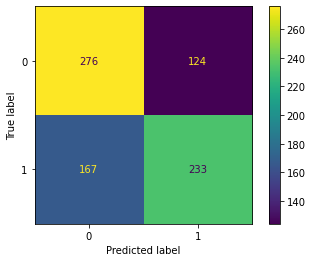

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


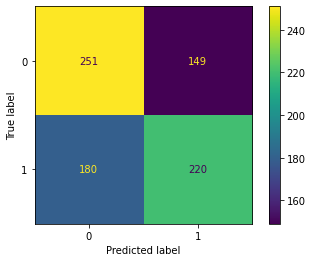

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


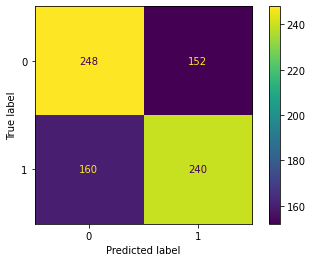

,Accuracy,Presicion,Recall,F1,ROC,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.5950,0.6160,0.5025,0.5488,0.6213,0.6026,0.5913,0.5877
Naive Bayes,0.6350,0.6784,0.5225,0.5884,0.6618,0.6439,0.6350,0.6295
Logistic Regression,0.6412,0.6731,0.5500,0.6025,0.6806,0.6474,0.6412,0.6368
AdaBoost,0.6362,0.6551,0.5825,0.6154,0.6620,0.6391,0.6362,0.6347
Random Forest,0.5838,0.6038,0.5500,0.5723,0.6321,0.6085,0.6025,0.5920
XGBoost,0.6100,0.6115,0.6000,0.6039,0.6470,0.6114,0.6100,0.6089


In [35]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#KAM敘述
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X,y)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


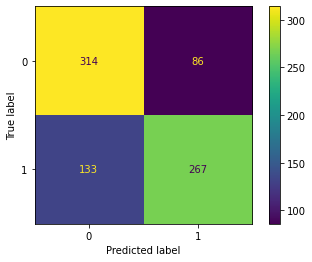

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


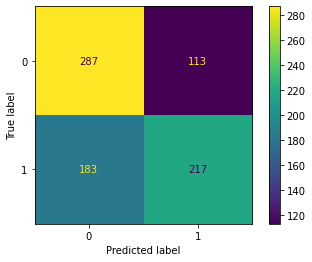

Logistic Regression
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


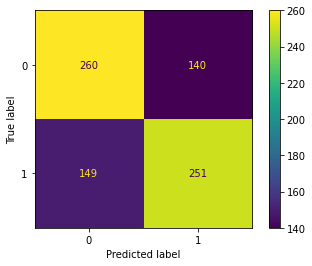

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


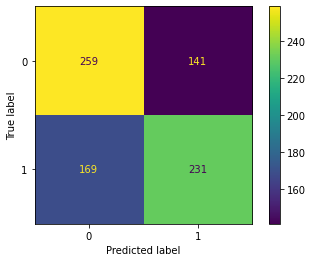

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


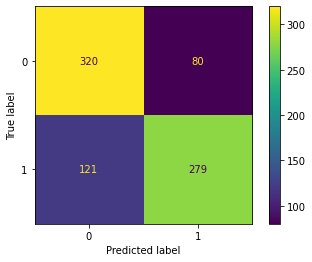

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


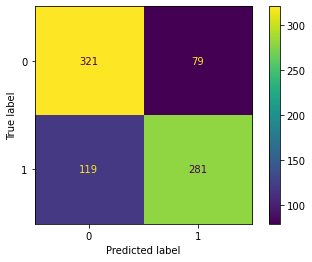

,Accuracy,Presicion,Recall,F1,ROC,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.7150,0.7633,0.6675,0.6932,0.7125,0.7322,0.7212,0.7234
Naive Bayes,0.6300,0.6575,0.5425,0.5922,0.6891,0.6348,0.6300,0.6258
Logistic Regression,0.6388,0.6455,0.6275,0.6342,0.6695,0.6406,0.6388,0.6374
AdaBoost,0.6125,0.6216,0.5775,0.5977,0.6743,0.6137,0.6125,0.6114
Random Forest,0.7463,0.7852,0.6925,0.7275,0.8494,0.7579,0.7463,0.7476
XGBoost,0.7525,0.7816,0.7025,0.7380,0.8244,0.7574,0.7525,0.7514


In [36]:
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#情感比率
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X1,y1)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


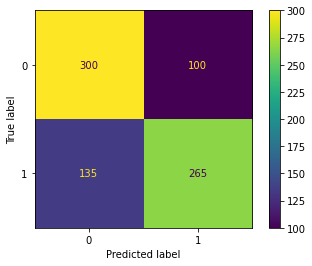

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


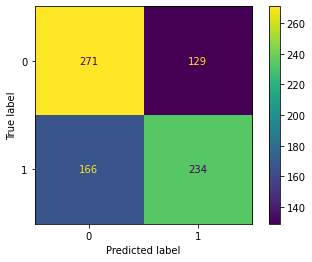

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

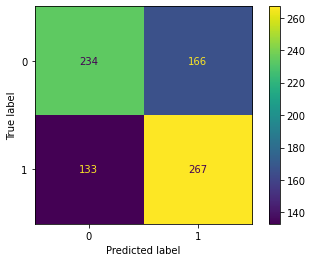

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


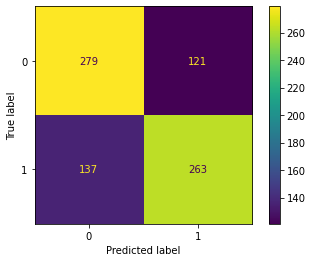

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


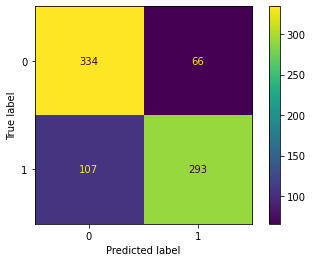

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


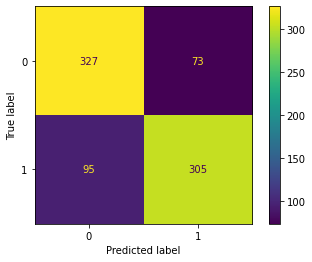

,Accuracy,Presicion,Recall,F1,ROC,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.7062,0.7296,0.6500,0.6803,0.6925,0.7020,0.7050,0.6985
Naive Bayes,0.6312,0.6461,0.5850,0.6129,0.6649,0.6332,0.6312,0.6299
Logistic Regression,0.6262,0.6161,0.6675,0.6396,0.6888,0.6289,0.6262,0.6249
AdaBoost,0.6775,0.6867,0.6575,0.6708,0.7441,0.6788,0.6775,0.6770
Random Forest,0.7875,0.8061,0.7500,0.7776,0.8637,0.7822,0.7825,0.7933
XGBoost,0.7900,0.8085,0.7625,0.7840,0.8494,0.7919,0.7900,0.7896


In [37]:
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X2,y2)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


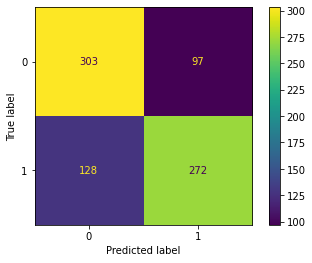

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


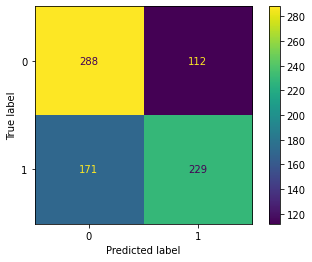

Logistic Regression
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


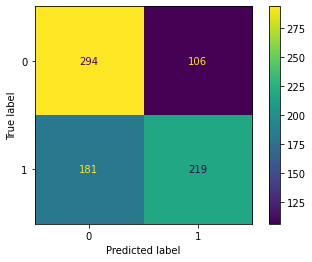

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


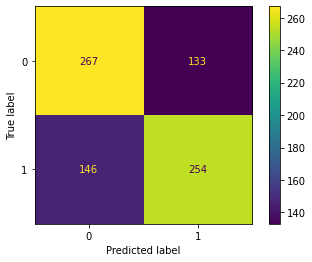

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


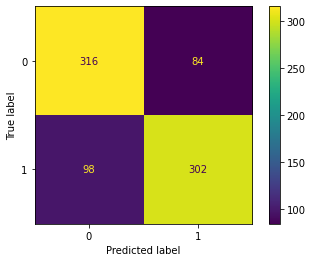

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


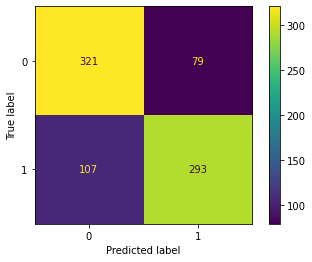

,Accuracy,Presicion,Recall,F1,ROC,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.7112,0.7436,0.6500,0.7003,0.7138,0.7165,0.7250,0.7189
Naive Bayes,0.6463,0.6702,0.5725,0.6166,0.7017,0.6496,0.6463,0.6437
Logistic Regression,0.6412,0.6747,0.5475,0.6015,0.6888,0.6479,0.6412,0.6366
AdaBoost,0.6512,0.6576,0.6350,0.6445,0.6993,0.6528,0.6512,0.6503
Random Forest,0.7462,0.7729,0.7425,0.7665,0.8524,0.7732,0.7675,0.7580
XGBoost,0.7675,0.7875,0.7325,0.7569,0.8422,0.7711,0.7675,0.7666


In [38]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#KAM敘述+情感
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X3,y3)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


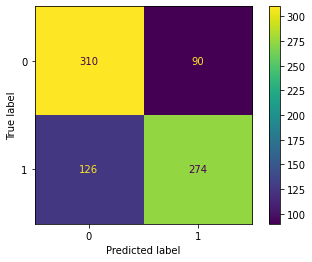

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


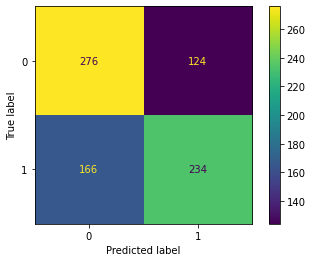

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


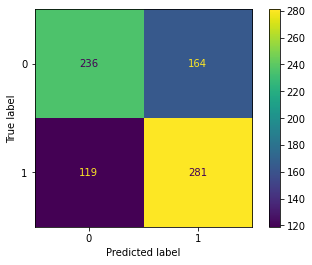

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


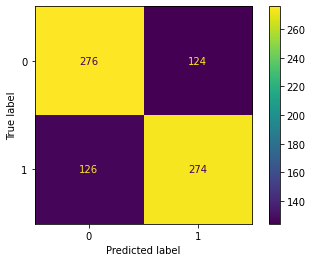

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


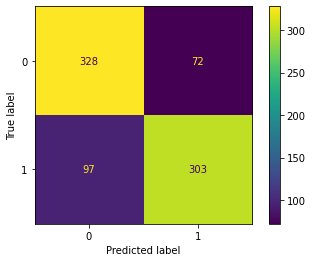

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


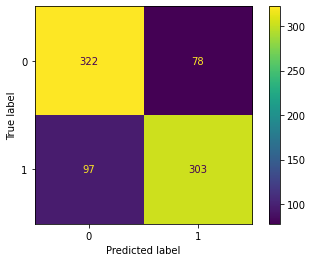

,Accuracy,Presicion,Recall,F1,ROC,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.7200,0.7507,0.6825,0.7090,0.7312,0.7326,0.7238,0.7263
Naive Bayes,0.6375,0.6550,0.5850,0.6171,0.6677,0.6398,0.6375,0.6361
Logistic Regression,0.6462,0.6333,0.7025,0.6645,0.7011,0.6501,0.6462,0.6441
AdaBoost,0.6875,0.6892,0.6850,0.6861,0.7450,0.6886,0.6875,0.6871
Random Forest,0.7788,0.8241,0.7600,0.7836,0.8708,0.7976,0.8038,0.7918
XGBoost,0.7812,0.7993,0.7575,0.7764,0.8544,0.7839,0.7812,0.7807


In [39]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#KAM敘述+可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X4,y4)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


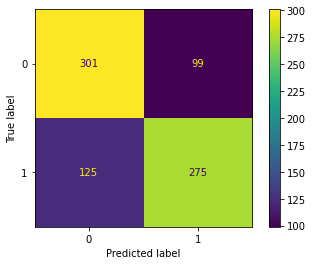

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


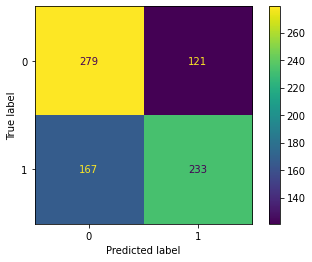

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


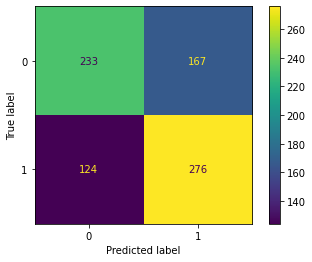

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


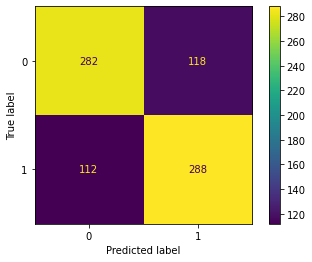

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


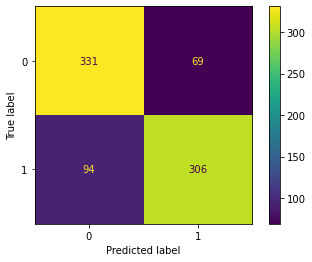

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


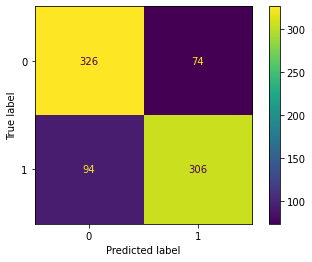

,Accuracy,Presicion,Recall,F1,ROC,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.7387,0.7541,0.6850,0.7131,0.7188,0.7264,0.7375,0.7341
Naive Bayes,0.6400,0.6588,0.5825,0.6176,0.6781,0.6424,0.6400,0.6385
Logistic Regression,0.6362,0.6236,0.6900,0.6539,0.6909,0.6397,0.6362,0.6344
AdaBoost,0.7125,0.7110,0.7200,0.7144,0.7892,0.7138,0.7125,0.7120
Random Forest,0.8000,0.8198,0.7600,0.7950,0.8932,0.8091,0.7962,0.7754
XGBoost,0.7900,0.8054,0.7650,0.7838,0.8769,0.7920,0.7900,0.7896


In [40]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#情感+可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X5,y5)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


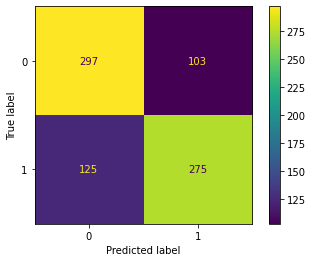

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


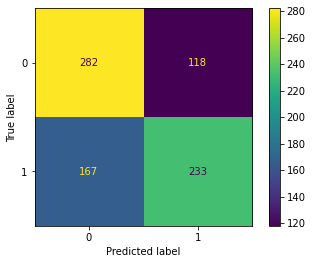

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

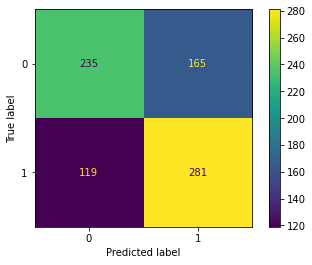

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


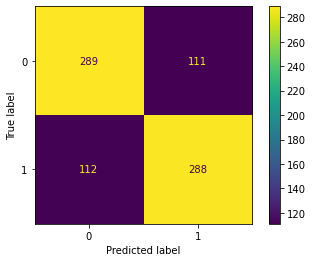

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


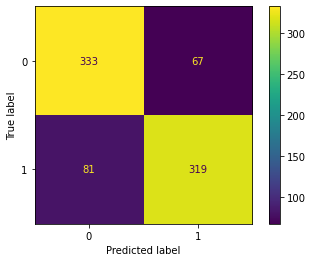

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


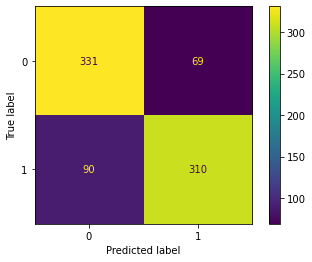

,Accuracy,Presicion,Recall,F1,ROC,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.7300,0.7339,0.7025,0.6938,0.7225,0.7238,0.7250,0.7168
Naive Bayes,0.6438,0.6643,0.5825,0.6201,0.6778,0.6464,0.6438,0.6421
Logistic Regression,0.6450,0.6313,0.7025,0.6637,0.7004,0.6485,0.6450,0.6429
AdaBoost,0.7212,0.7266,0.7200,0.7215,0.7906,0.7238,0.7212,0.7206
Random Forest,0.8025,0.8160,0.7850,0.7985,0.8897,0.8000,0.8088,0.8071
XGBoost,0.8012,0.8208,0.7750,0.7953,0.8849,0.8049,0.8013,0.8006


In [41]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#ALL
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X6,y6)
ResultToFrame()

#### 做unigram

#### 跑模型

In [48]:
X=df.iloc[: ,49:]#50?
y=df['是否為四大事務所']

In [49]:
X.columns

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       ...
       '鼓風機', '齊備', '齒部', '齡明細表', '龍巖', '龍翩', '龍邦', '龍騰', '龐大', '龜山區'],
      dtype='object', length=12511)

In [50]:
print(len(X))
print(len(y))

800
800


Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


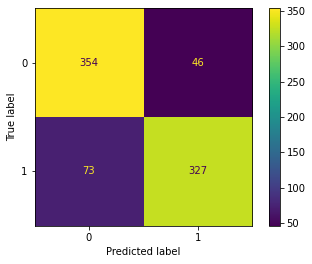

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


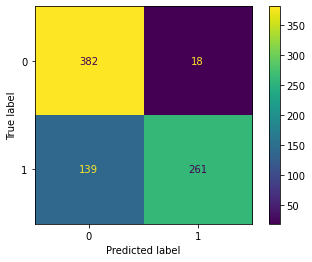

Logistic Regression


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

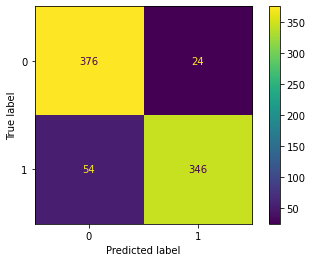

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


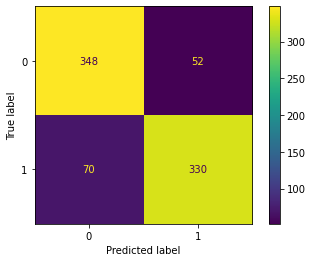

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


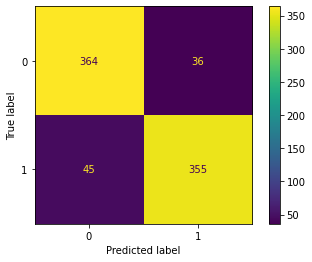

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


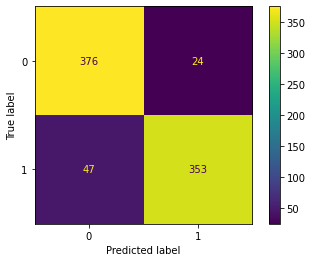

,Accuracy,Presicion,Recall,F1,ROC,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.8350,0.8588,0.7900,0.8260,0.8312,0.8316,0.8300,0.8423
Naive Bayes,0.8038,0.9426,0.6525,0.7657,0.8061,0.8396,0.8038,0.7979
Logistic Regression,0.9025,0.9369,0.8650,0.8980,0.9542,0.9070,0.9025,0.9022
AdaBoost,0.8475,0.8656,0.8250,0.8433,0.9266,0.8503,0.8475,0.8472
Random Forest,0.9038,0.9156,0.8950,0.9031,0.9675,0.9007,0.9012,0.9074
XGBoost,0.9112,0.9366,0.8825,0.9080,0.9711,0.9138,0.9112,0.9111


In [51]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X,y)
ResultToFrame()

In [53]:
df.to_csv('unigram一比一資料.csv')

In [54]:
df.to_excel('unigram一比一資料.xlsx')

#### 全部加起來跑

In [3]:
df_path = './unigram一比一資料.xlsx'
df = pd.read_excel(df_path)
df = pd.DataFrame(df)

In [4]:
df.columns

Index(['Unnamed: 0', '公司代碼', '公司名稱_x', '事務所碼', '事務所名稱', '是否為四大事務所', '四大事務所編碼',
       '會計師一', '會計師二', 'KAM',
       ...
       '鼓風機', '齊備', '齒部', '齡明細表', '龍巖', '龍翩', '龍邦', '龍騰', '龐大', '龜山區'],
      dtype='object', length=12561)

In [22]:
X=df.iloc[: ,9:]
y=df['是否為四大事務所']

In [25]:
X = X.drop(columns=['斷詞(詞性標記)'])

In [27]:
X

,KAM_len,KAM項目數,KAM平均詞數,段落數,段落平均句數,字數,詞數,相異詞數比率,難詞數,低筆劃字元數,...,鼓風機,齊備,齒部,齡明細表,龍巖,龍翩,龍邦,龍騰,龐大,龜山區
0,213,1,213.00,1,16,374,197,0.578680,72,225,...,0,0,0,0,0,0,0,0,0,0
1,442,2,221.00,1,27,790,410,0.400000,139,505,...,0,0,0,0,0,0,0,0,0,0
2,336,1,336.00,1,25,593,324,0.521605,113,324,...,0,0,0,0,0,0,0,0,0,0
3,562,2,281.00,1,39,950,540,0.405556,186,560,...,0,0,0,0,0,0,0,0,0,0
4,581,2,290.50,1,33,1026,558,0.349462,195,595,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,292,1,292.00,1,18,524,287,0.435540,101,340,...,0,0,0,0,0,0,0,0,0,0
796,272,1,272.00,1,14,486,265,0.479245,78,334,...,0,0,0,0,0,0,0,0,1,0
797,820,3,273.33,1,58,1451,825,0.351515,273,831,...,0,0,0,0,0,0,0,0,0,0
798,653,3,217.67,1,46,1128,645,0.382946,216,637,...,0,0,0,0,0,0,0,0,0,0


Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


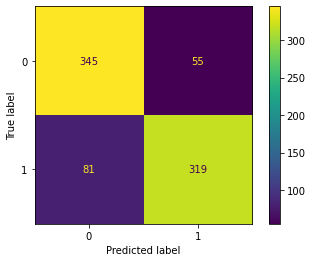

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


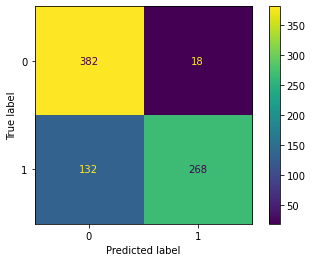

Logistic Regression


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

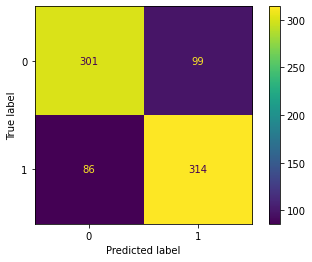

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


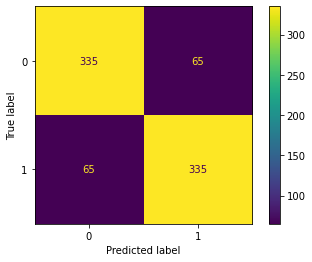

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


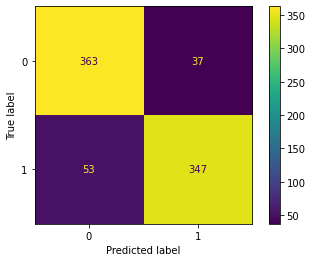

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


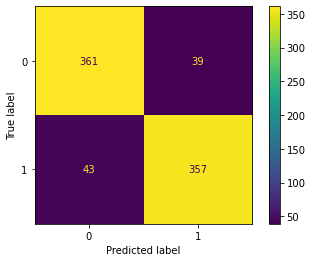

,Accuracy,Presicion,Recall,F1,ROC,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.8250,0.8441,0.7750,0.8102,0.8262,0.8183,0.8350,0.8156
Naive Bayes,0.8125,0.9445,0.6700,0.7783,0.8724,0.8459,0.8125,0.8073
Logistic Regression,0.7688,0.7637,0.7850,0.7720,0.8594,0.7724,0.7688,0.7679
AdaBoost,0.8375,0.8375,0.8375,0.8367,0.9164,0.8388,0.8375,0.8373
Random Forest,0.8962,0.9068,0.8475,0.8893,0.9570,0.8926,0.8725,0.8961
XGBoost,0.8975,0.9040,0.8925,0.8963,0.9657,0.9010,0.8975,0.8972


In [26]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X,y)
ResultToFrame()